In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
sns.__version__

'0.11.1'

In [55]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [56]:
%matplotlib inline

In [57]:
df = pd.read_excel(r'C:\Users\rob\OneDrive\Desktop\case_study_data csv PRICING ANALYST SENNDER 2021 Rob.xlsx')

In [58]:
df.head()

,PICKUP_MONTH,SHIPPER ID,SHIPPER CATEGORY,LOAD CATEGORY,ORDER_TYPE,DOMESTIC_VS_CROSS_BORDER,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST)
0,2020-01-01,0010O00001vmYzfQAE,Food & Beverages,PLATFORM,CONTRACT,domestic,141,106909.44813,107080.23750
1,2020-01-01,0010O00002M1P8nQAF,Industrial materials,PLATFORM,CONTRACT,cross-border,1,2702.50000,2300.00000
2,2020-01-01,0013Y00002UjLn1QAF,Industrial materials,PLATFORM,SPOT,cross-border,1,1091.25000,1030.62500
3,2020-01-01,0010O00002Bji22QAB,Other Manufacturing,PLATFORM,SPOT,cross-border,5,13051.25000,10361.50000
4,2020-01-01,0013Y00002UkaqeQAB,Food & Beverages,PLATFORM,CONTRACT,cross-border,1,2227.50000,2014.87500


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   PICKUP_MONTH              1001 non-null   datetime64[ns]
 1   SHIPPER ID                1001 non-null   object        
 2   SHIPPER CATEGORY          1001 non-null   object        
 3   LOAD CATEGORY             1001 non-null   object        
 4   ORDER_TYPE                1001 non-null   object        
 5   DOMESTIC_VS_CROSS_BORDER  1001 non-null   object        
 6   LOADS                     1001 non-null   int64         
 7   SHIPPER_PRICE (REVENUE)   1001 non-null   float64       
 8   CARRIER_PRICE (COST)      1001 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 70.5+ KB


9 columns, 1001 rows, are columns in correct Dtype?

In [60]:
df.describe()

,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST)
count,1001.00000,1001.00000,1001.00000
mean,19.06394,17059.39487,16471.79650
std,60.49590,44688.48427,42713.13616
min,1.00000,212.50000,159.37500
25%,1.00000,1615.00000,1507.00000
50%,4.00000,4141.50000,3961.75000
75%,13.00000,13524.00000,13371.50000
max,740.00000,456615.50362,474605.07500


In [61]:
#Check missing values
df.isnull().sum()

PICKUP_MONTH                0
SHIPPER ID                  0
SHIPPER CATEGORY            0
LOAD CATEGORY               0
ORDER_TYPE                  0
DOMESTIC_VS_CROSS_BORDER    0
LOADS                       0
SHIPPER_PRICE (REVENUE)     0
CARRIER_PRICE (COST)        0
dtype: int64

In [62]:
#Check number of unique entries per column
df.nunique()

PICKUP_MONTH                  6
SHIPPER ID                  191
SHIPPER CATEGORY              7
LOAD CATEGORY                 2
ORDER_TYPE                    2
DOMESTIC_VS_CROSS_BORDER      2
LOADS                       103
SHIPPER_PRICE (REVENUE)     930
CARRIER_PRICE (COST)        959
dtype: int64

In [63]:
# Percent of unique row entries per column
df.nunique() / df.count() * 100

PICKUP_MONTH                0.59940
SHIPPER ID                 19.08092
SHIPPER CATEGORY            0.69930
LOAD CATEGORY               0.19980
ORDER_TYPE                  0.19980
DOMESTIC_VS_CROSS_BORDER    0.19980
LOADS                      10.28971
SHIPPER_PRICE (REVENUE)    92.90709
CARRIER_PRICE (COST)       95.80420
dtype: float64

In [64]:
# Extract month from Pickup_month
df['MONTH'] = df['PICKUP_MONTH'].dt.month
#df['MONTH'] = pd.to_datetime(df['PICKUP_MONTH'], format='%m').dt.month_name()

In [65]:
# Add profit column
df['PROFIT'] =  df['SHIPPER_PRICE (REVENUE)'] - df['CARRIER_PRICE (COST)']

In [66]:
# Add avg. profit/load column
df['AVG_PROFIT_LOAD'] = df['PROFIT'] / df['LOADS']

In [67]:
# Add avg. revenue/load column
df['AVG_REV_LOAD'] = df['SHIPPER_PRICE (REVENUE)'] / df['LOADS']

In [68]:
# Add avg. exp/load column
df['AVG_EXP_LOAD'] = df['CARRIER_PRICE (COST)'] / df['LOADS']

In [136]:
df['MARGIN'] = (df['PROFIT'] / df['SHIPPER_PRICE (REVENUE)']) * 100

## Exploratory Data Analysis

In [137]:
df.head()

,PICKUP_MONTH,SHIPPER ID,SHIPPER CATEGORY,LOAD CATEGORY,ORDER_TYPE,DOMESTIC_VS_CROSS_BORDER,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST),MONTH,PROFIT,AVG_PROFIT_LOAD,AVG_REV_LOAD,AVG_EXP_LOAD,MARGIN
0,2020-01-01,0010O00001vmYzfQAE,Food & Beverages,PLATFORM,CONTRACT,domestic,141,106909.44813,107080.23750,1,-170.78937,-1.21127,758.22304,759.43431,-0.15975
1,2020-01-01,0010O00002M1P8nQAF,Industrial materials,PLATFORM,CONTRACT,cross-border,1,2702.50000,2300.00000,1,402.50000,402.50000,2702.50000,2300.00000,14.89362
2,2020-01-01,0013Y00002UjLn1QAF,Industrial materials,PLATFORM,SPOT,cross-border,1,1091.25000,1030.62500,1,60.62500,60.62500,1091.25000,1030.62500,5.55556
3,2020-01-01,0010O00002Bji22QAB,Other Manufacturing,PLATFORM,SPOT,cross-border,5,13051.25000,10361.50000,1,2689.75000,537.95000,2610.25000,2072.30000,20.60914
4,2020-01-01,0013Y00002UkaqeQAB,Food & Beverages,PLATFORM,CONTRACT,cross-border,1,2227.50000,2014.87500,1,212.62500,212.62500,2227.50000,2014.87500,9.54545


## Initial thoughts
1. Are IDs unique or multiple loads per ID
2. Which category has most loads, most profitable, most expenses
3. Which category has most laods, most profitbale, most expenses
4. Which order type has most laods, most profitable, most expenses
5. Domestic or cross-border most loads, profitbale, expensive
6. Can check retention of customers month-to-month, quarter-to-quarter
7. Compare price per trip so get contract vs spot individual pricing, perhaps spots are more lucrative?

In [ ]:
# Seperate data into Q1 and Q2 - Month 1,2,3 = Q1

In [138]:
q1 = df[df['MONTH'] < 4]

In [139]:
# check dataframe separated correctly
q1['MONTH'].value_counts()

3    170
2    144
1    129
Name: MONTH, dtype: int64

In [140]:
q2 = df[df['MONTH'] > 3]

In [141]:
q2['MONTH'].value_counts()

6    209
5    178
4    171
Name: MONTH, dtype: int64

In [142]:
# Sense check that total rows of df = q1 + q2

In [143]:
q1.count() + q2.count()

PICKUP_MONTH                1001
SHIPPER ID                  1001
SHIPPER CATEGORY            1001
LOAD CATEGORY               1001
ORDER_TYPE                  1001
DOMESTIC_VS_CROSS_BORDER    1001
LOADS                       1001
SHIPPER_PRICE (REVENUE)     1001
CARRIER_PRICE (COST)        1001
MONTH                       1001
PROFIT                      1001
AVG_PROFIT_LOAD             1001
AVG_REV_LOAD                1001
AVG_EXP_LOAD                1001
MARGIN                      1001
dtype: int64

## Q1 2020 Analysis

In [144]:
q1.head()

,PICKUP_MONTH,SHIPPER ID,SHIPPER CATEGORY,LOAD CATEGORY,ORDER_TYPE,DOMESTIC_VS_CROSS_BORDER,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST),MONTH,PROFIT,AVG_PROFIT_LOAD,AVG_REV_LOAD,AVG_EXP_LOAD,MARGIN
0,2020-01-01,0010O00001vmYzfQAE,Food & Beverages,PLATFORM,CONTRACT,domestic,141,106909.44813,107080.23750,1,-170.78937,-1.21127,758.22304,759.43431,-0.15975
1,2020-01-01,0010O00002M1P8nQAF,Industrial materials,PLATFORM,CONTRACT,cross-border,1,2702.50000,2300.00000,1,402.50000,402.50000,2702.50000,2300.00000,14.89362
2,2020-01-01,0013Y00002UjLn1QAF,Industrial materials,PLATFORM,SPOT,cross-border,1,1091.25000,1030.62500,1,60.62500,60.62500,1091.25000,1030.62500,5.55556
3,2020-01-01,0010O00002Bji22QAB,Other Manufacturing,PLATFORM,SPOT,cross-border,5,13051.25000,10361.50000,1,2689.75000,537.95000,2610.25000,2072.30000,20.60914
4,2020-01-01,0013Y00002UkaqeQAB,Food & Beverages,PLATFORM,CONTRACT,cross-border,1,2227.50000,2014.87500,1,212.62500,212.62500,2227.50000,2014.87500,9.54545


In [145]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 442
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   PICKUP_MONTH              443 non-null    datetime64[ns]
 1   SHIPPER ID                443 non-null    object        
 2   SHIPPER CATEGORY          443 non-null    object        
 3   LOAD CATEGORY             443 non-null    object        
 4   ORDER_TYPE                443 non-null    object        
 5   DOMESTIC_VS_CROSS_BORDER  443 non-null    object        
 6   LOADS                     443 non-null    int64         
 7   SHIPPER_PRICE (REVENUE)   443 non-null    float64       
 8   CARRIER_PRICE (COST)      443 non-null    float64       
 9   MONTH                     443 non-null    int64         
 10  PROFIT                    443 non-null    float64       
 11  AVG_PROFIT_LOAD           443 non-null    float64       
 12  AVG_REV_LOAD          

In [146]:
q1.describe()

,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST),MONTH,PROFIT,AVG_PROFIT_LOAD,AVG_REV_LOAD,AVG_EXP_LOAD,MARGIN
count,443.00000,443.00000,443.00000,443.00000,443.00000,443.00000,443.00000,443.00000,443.00000
mean,22.77878,19954.05268,19865.00562,2.09255,89.04706,-9.87972,1249.75084,1259.63056,-0.64377
std,75.43923,50746.81775,49709.08573,0.81724,5905.65986,182.48570,736.67226,762.07130,13.77281
min,1.00000,344.66250,341.25000,1.00000,-47862.58125,-939.31250,267.54429,223.12500,-71.17117
25%,2.00000,1941.28125,1941.00000,1.00000,-319.12500,-61.45002,701.30469,683.66265,-5.29115
50%,5.00000,5395.50000,5212.50000,2.00000,43.96800,16.74569,1067.00000,1058.50000,1.98327
75%,17.00000,18367.18750,18541.87500,3.00000,338.09544,61.95577,1600.30949,1641.00263,5.61264
max,740.00000,456615.50362,474605.07500,3.00000,85032.10875,634.37500,4410.00000,4230.00000,53.15315


## Key business figures

In [147]:
# check total revenue, cost, profit, volume
cols = ['PROFIT','SHIPPER_PRICE (REVENUE)','CARRIER_PRICE (COST)','LOADS']
q1[cols].sum()

PROFIT                      39447.84775
SHIPPER_PRICE (REVENUE)   8839645.33875
CARRIER_PRICE (COST)      8800197.49100
LOADS                       10091.00000
dtype: float64

In [148]:
margin = q1['PROFIT'].sum() / q1['SHIPPER_PRICE (REVENUE)'].sum() * 100
print(margin)

0.44626052560133994


In [149]:
q1['LOADS'].sum()

10091

In [150]:
q1[q1['ORDER_TYPE']=='CONTRACT'].sum()

SHIPPER ID                  0010O00001vmYzfQAE0010O00002M1P8nQAF0013Y00002...
SHIPPER CATEGORY            Food & BeveragesIndustrial materialsFood & Bev...
LOAD CATEGORY               PLATFORMPLATFORMPLATFORMPLATFORMPLATFORMPLATFO...
ORDER_TYPE                  CONTRACTCONTRACTCONTRACTCONTRACTCONTRACTCONTRA...
DOMESTIC_VS_CROSS_BORDER    domesticcross-bordercross-bordercross-bordercr...
LOADS                                                                    9672
SHIPPER_PRICE (REVENUE)                                         8429324.88075
CARRIER_PRICE (COST)                                            8405305.86375
MONTH                                                                     741
PROFIT                                                            24019.01700
AVG_PROFIT_LOAD                                                   -8065.54166
AVG_REV_LOAD                                                     459728.21799
AVG_EXP_LOAD                                                    

In [151]:
q1[q1['ORDER_TYPE']=='CONTRACT'].count()

PICKUP_MONTH                359
SHIPPER ID                  359
SHIPPER CATEGORY            359
LOAD CATEGORY               359
ORDER_TYPE                  359
DOMESTIC_VS_CROSS_BORDER    359
LOADS                       359
SHIPPER_PRICE (REVENUE)     359
CARRIER_PRICE (COST)        359
MONTH                       359
PROFIT                      359
AVG_PROFIT_LOAD             359
AVG_REV_LOAD                359
AVG_EXP_LOAD                359
MARGIN                      359
dtype: int64

In [152]:
q1[q1['ORDER_TYPE']=='SPOT'].sum()

SHIPPER ID                  0013Y00002UjLn1QAF0010O00002Bji22QAB0013Y00002...
SHIPPER CATEGORY            Industrial materialsOther ManufacturingFood & ...
LOAD CATEGORY               PLATFORMPLATFORMPLATFORMMANUALMANUALPLATFORMPL...
ORDER_TYPE                  SPOTSPOTSPOTSPOTSPOTSPOTSPOTSPOTSPOTSPOTSPOTSP...
DOMESTIC_VS_CROSS_BORDER    cross-bordercross-borderdomesticcross-borderdo...
LOADS                                                                     419
SHIPPER_PRICE (REVENUE)                                          410320.45800
CARRIER_PRICE (COST)                                             394891.62725
MONTH                                                                     186
PROFIT                                                            15428.83075
AVG_PROFIT_LOAD                                                    3688.82420
AVG_REV_LOAD                                                      93911.40223
AVG_EXP_LOAD                                                    

In [153]:
q1[q1['ORDER_TYPE']=='SPOT'].count()

PICKUP_MONTH                84
SHIPPER ID                  84
SHIPPER CATEGORY            84
LOAD CATEGORY               84
ORDER_TYPE                  84
DOMESTIC_VS_CROSS_BORDER    84
LOADS                       84
SHIPPER_PRICE (REVENUE)     84
CARRIER_PRICE (COST)        84
MONTH                       84
PROFIT                      84
AVG_PROFIT_LOAD             84
AVG_REV_LOAD                84
AVG_EXP_LOAD                84
MARGIN                      84
dtype: int64

In [154]:
q1['SHIPPER ID'].count()

443

In [155]:
active_customers = q1['SHIPPER ID'].nunique()
print(active_customers)

131


In [156]:
active_customers_month = q1.groupby('MONTH')['SHIPPER ID'].nunique()
print(active_customers_month)

MONTH
1     81
2     96
3    104
Name: SHIPPER ID, dtype: int64


In [157]:
unique_customers = q1.groupby('SHIPPER ID')

In [158]:
# highest loads per Shipper ID
unique_customers.max().sort_values(by='LOADS',ascending=False)

,PICKUP_MONTH,SHIPPER CATEGORY,LOAD CATEGORY,ORDER_TYPE,DOMESTIC_VS_CROSS_BORDER,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST),MONTH,PROFIT,AVG_PROFIT_LOAD,AVG_REV_LOAD,AVG_EXP_LOAD,MARGIN
SHIPPER ID,,,,,,,,,,,,,,
0010O00001vmYzfQAE,2020-03-01,Food & Beverages,PLATFORM,CONTRACT,domestic,740,426742.49375,474605.07500,3,18318.19938,36.14394,758.22304,759.43431,5.61677
0010O00002IfhmrQAB,2020-03-01,Hospitality,PLATFORM,SPOT,domestic,726,456615.50362,371583.39487,3,85032.10875,398.15625,3359.62500,2961.46875,32.15661
0010O00002BjhzcQAB,2020-03-01,Food & Beverages,PLATFORM,SPOT,domestic,300,307004.53425,289786.12500,3,17218.40925,147.90000,1153.52679,1127.67536,15.11111
0010O00002BF1aSQAT,2020-03-01,Consumer Goods,PLATFORM,SPOT,domestic,280,139000.58000,172425.00000,3,330.00000,165.00000,1540.00000,1375.00000,10.71429
0010O00002E9BbyQAF,2020-03-01,Consumer Goods,PLATFORM,SPOT,domestic,226,406710.71613,432114.51250,3,743.47625,112.89696,2983.98250,3544.50000,6.10123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0010O00002CshdhQAB,2020-02-01,Food & Beverages,PLATFORM,CONTRACT,cross-border,1,4141.50000,4001.25000,2,140.25000,140.25000,4141.50000,4001.25000,3.38645
0013Y00002TSf0dQAD,2020-03-01,Other,PLATFORM,CONTRACT,domestic,1,698.25000,698.25000,3,33.25000,33.25000,698.25000,698.25000,4.76190
0010O00002M1t50QAB,2020-03-01,Food & Beverages,PLATFORM,CONTRACT,cross-border,1,3751.87500,3643.12500,3,108.75000,108.75000,3751.87500,3643.12500,2.89855


In [159]:
sum_profit = q1.groupby(['MONTH'])['PROFIT'].sum()
print(sum_profit)

MONTH
1    25648.31863
2   100065.33362
3   -86265.80450
Name: PROFIT, dtype: float64


In [160]:
profit_by_month = q1.groupby('MONTH').agg(revenue = ('SHIPPER_PRICE (REVENUE)','sum'),expense=('CARRIER_PRICE (COST)','sum'),profit=('PROFIT','sum'))

<AxesSubplot:ylabel='MONTH'>

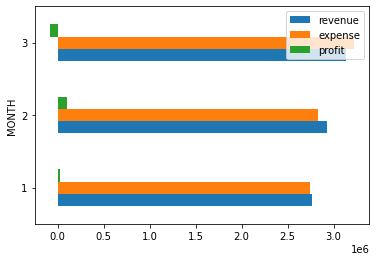

In [161]:

profit_by_month.plot(kind='barh')

## 1. Contract vs Spot (Order Type)

In [162]:
sum_profit1 = q1.groupby(['MONTH','ORDER_TYPE'])['PROFIT'].sum()
print(sum_profit1)

MONTH  ORDER_TYPE
1      CONTRACT      22872.80363
       SPOT           2775.51500
2      CONTRACT      94387.05238
       SPOT           5678.28125
3      CONTRACT     -93240.83900
       SPOT           6975.03450
Name: PROFIT, dtype: float64


<AxesSubplot:title={'center':'Contract vs Spot Profit Per Month'}, ylabel='MONTH,ORDER_TYPE'>

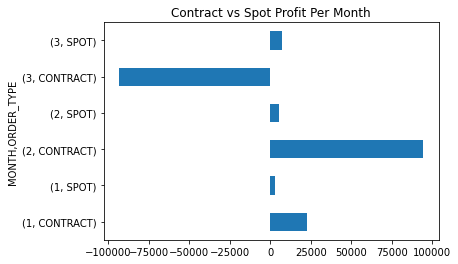

In [163]:
sum_profit1.plot(kind='barh',title='Contract vs Spot Profit Per Month')

In [164]:
sum_profit1a = q1.groupby(['ORDER_TYPE'])['PROFIT'].sum()
print(sum_profit1a)

ORDER_TYPE
CONTRACT   24019.01700
SPOT       15428.83075
Name: PROFIT, dtype: float64


<AxesSubplot:ylabel='ORDER_TYPE'>

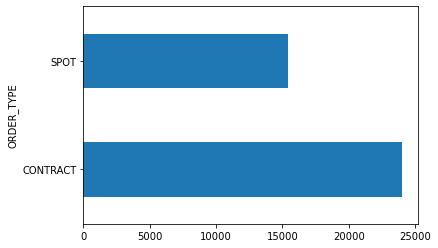

In [165]:
sum_profit1a.plot(kind='barh')

## 2. Platform vs Manual (Load Category)

In [166]:
sum_profit2 = q1.groupby(['MONTH','LOAD CATEGORY'])['PROFIT'].sum()
print(sum_profit2)

MONTH  LOAD CATEGORY
1      MANUAL            3417.10925
       PLATFORM         22231.20938
2      MANUAL           31023.20975
       PLATFORM         69042.12388
3      MANUAL          -19638.19400
       PLATFORM        -66627.61050
Name: PROFIT, dtype: float64


<AxesSubplot:ylabel='MONTH,LOAD CATEGORY'>

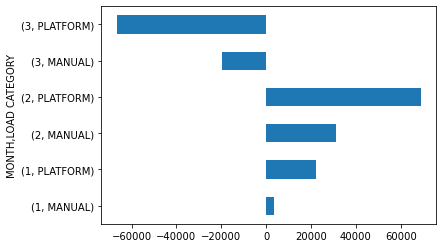

In [167]:
sum_profit2.plot(kind='barh')

In [168]:
sum_profit2a = q1.groupby(['LOAD CATEGORY'])['PROFIT'].sum()
print(sum_profit2a)

LOAD CATEGORY
MANUAL     14802.12500
PLATFORM   24645.72275
Name: PROFIT, dtype: float64


<AxesSubplot:ylabel='LOAD CATEGORY'>

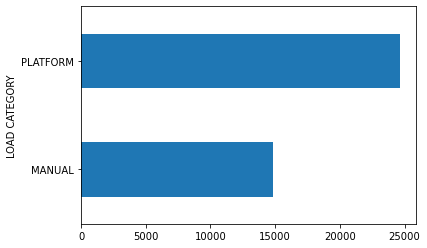

In [169]:
sum_profit2a.plot(kind='barh')

## 3. Industry (Shipper Category)

In [205]:
q1.groupby(['SHIPPER CATEGORY'])['PROFIT'].sum().sort_values(ascending=False)

SHIPPER CATEGORY
Hospitality                         160409.16850
Automotive & Automotive Supplier      8159.20500
Food & Beverages                      7467.48000
Other                                 4447.58625
Other Manufacturing                  -6178.72500
Industrial materials                 -8366.54175
Consumer Goods                     -126490.32525
Name: PROFIT, dtype: float64

In [208]:
a = q1.groupby(['SHIPPER CATEGORY'])['SHIPPER_PRICE (REVENUE)'].sum()
b = q1.groupby(['SHIPPER CATEGORY'])['PROFIT'].sum()
c = b/a * 100

In [209]:
c.sort_values(ascending=False)

SHIPPER CATEGORY
Hospitality                         8.65601
Automotive & Automotive Supplier    7.18700
Other                               0.90183
Food & Beverages                    0.23930
Other Manufacturing                -0.56104
Industrial materials               -1.65309
Consumer Goods                     -7.65738
dtype: float64

In [215]:
a=q1.groupby(['MONTH','SHIPPER CATEGORY'])['PROFIT'].sum()
b=q1.groupby(['MONTH','SHIPPER CATEGORY'])['SHIPPER_PRICE (REVENUE)'].sum()
c=a/b*100
c

MONTH  SHIPPER CATEGORY                
1      Automotive & Automotive Supplier    11.12906
       Consumer Goods                      -7.61024
       Food & Beverages                    -1.85086
       Hospitality                         12.37442
       Industrial materials                -2.10095
       Other                               -6.01424
       Other Manufacturing                 -1.36504
2      Automotive & Automotive Supplier    12.59572
       Consumer Goods                      -2.53648
       Food & Beverages                     4.24209
       Hospitality                          8.10806
       Industrial materials                 1.09822
       Other                                0.55420
       Other Manufacturing                  0.26847
3      Automotive & Automotive Supplier    -7.07687
       Consumer Goods                     -10.78079
       Food & Beverages                    -1.64400
       Hospitality                          3.04774
       Industrial materi

In [212]:
sum_profit3 = q1.groupby(['MONTH','SHIPPER CATEGORY'])['PROFIT'].sum()
sum_profit3

MONTH  SHIPPER CATEGORY                
1      Automotive & Automotive Supplier     5992.12500
       Consumer Goods                     -39914.90500
       Food & Beverages                   -15873.64437
       Hospitality                         88884.20188
       Industrial materials                -4128.65388
       Other                               -4666.36750
       Other Manufacturing                 -4644.43750
2      Automotive & Automotive Supplier     4091.89500
       Consumer Goods                     -10757.68738
       Food & Beverages                    43632.90650
       Hospitality                         59183.86975
       Industrial materials                 2011.23225
       Other                                 906.08000
       Other Manufacturing                   997.03750
3      Automotive & Automotive Supplier    -1924.81500
       Consumer Goods                     -75817.73287
       Food & Beverages                   -20291.78212
       Hospitality       

<AxesSubplot:ylabel='MONTH,SHIPPER CATEGORY'>

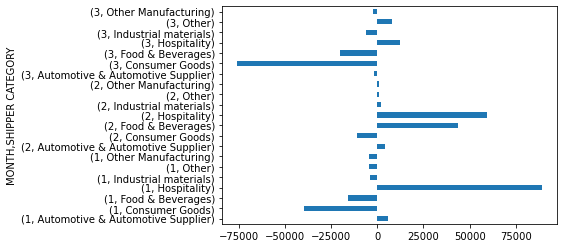

In [171]:
sum_profit3.plot(kind='barh')

In [172]:
sum_profit3a = q1.groupby(['SHIPPER CATEGORY'])['PROFIT'].sum()
print(sum_profit3a)

SHIPPER CATEGORY
Automotive & Automotive Supplier      8159.20500
Consumer Goods                     -126490.32525
Food & Beverages                      7467.48000
Hospitality                         160409.16850
Industrial materials                 -8366.54175
Other                                 4447.58625
Other Manufacturing                  -6178.72500
Name: PROFIT, dtype: float64


<AxesSubplot:ylabel='SHIPPER CATEGORY'>

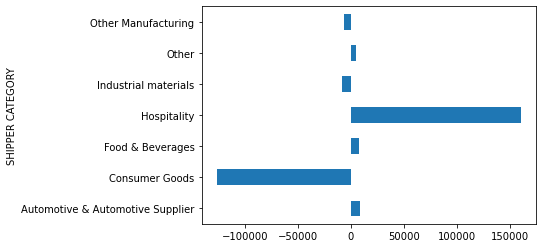

In [173]:
sum_profit3a.plot(kind='barh')

## 4. Destination (Domestic vs Cross Border)

In [174]:
sum_profit4 = q1.groupby(['MONTH','DOMESTIC_VS_CROSS_BORDER'])['PROFIT'].sum()
print(sum_profit4)

MONTH  DOMESTIC_VS_CROSS_BORDER
1      cross-border               -59899.65225
       domestic                    85547.97088
2      cross-border                -9406.65100
       domestic                   109471.98463
3      cross-border               -46182.16075
       domestic                   -40083.64375
Name: PROFIT, dtype: float64


<AxesSubplot:ylabel='MONTH,DOMESTIC_VS_CROSS_BORDER'>

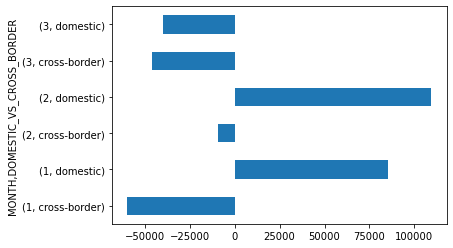

In [175]:
sum_profit4.plot(kind='barh')

In [176]:
sum_profit4a = q1.groupby(['DOMESTIC_VS_CROSS_BORDER'])['PROFIT'].sum()
print(sum_profit4a)

DOMESTIC_VS_CROSS_BORDER
cross-border   -115488.46400
domestic        154936.31175
Name: PROFIT, dtype: float64


<AxesSubplot:ylabel='DOMESTIC_VS_CROSS_BORDER'>

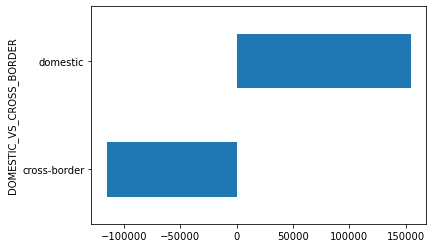

In [177]:
sum_profit4a.plot(kind='barh')

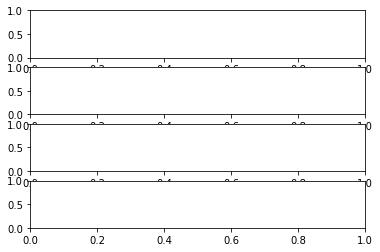

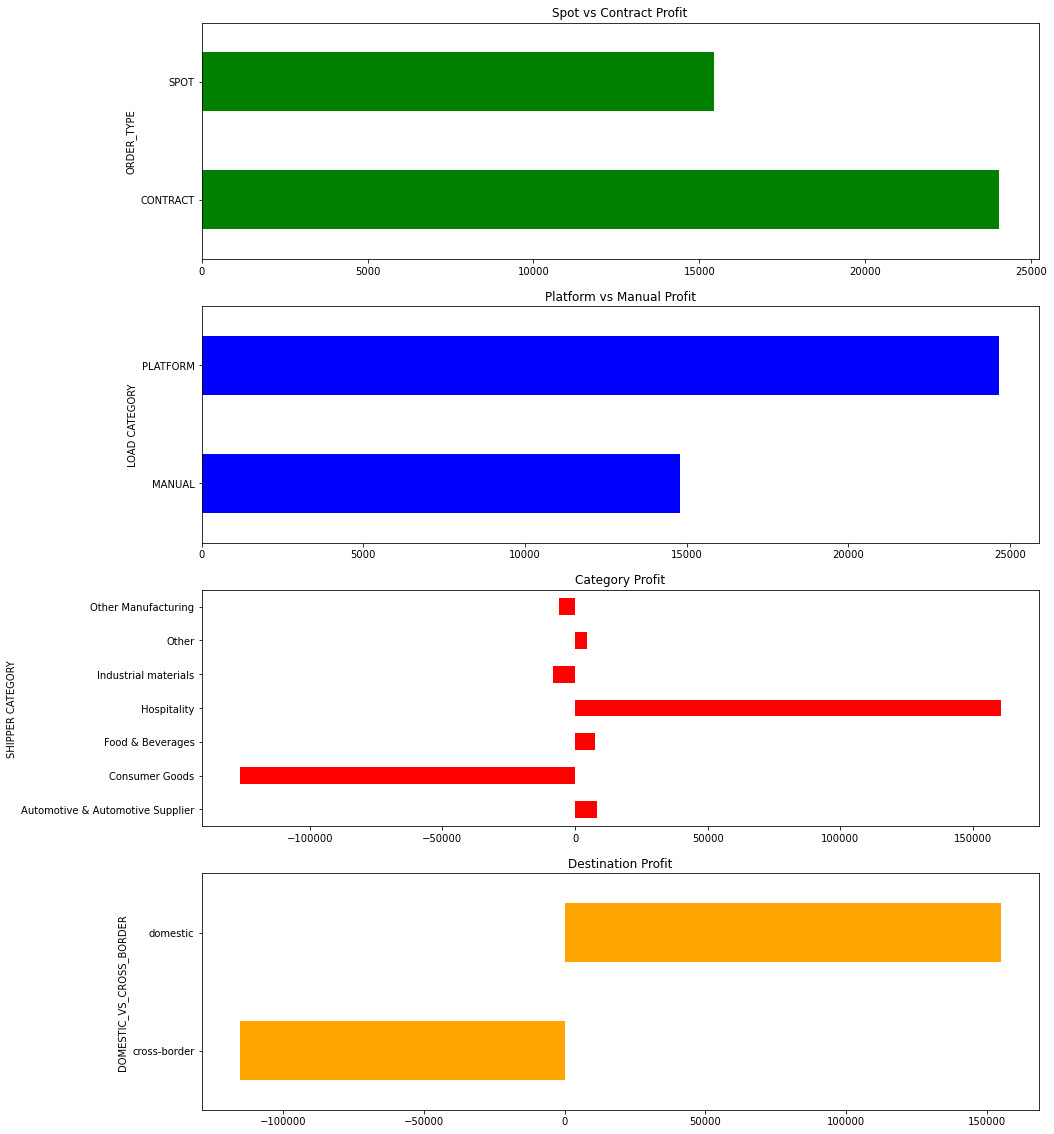

In [178]:
fig, axs = plt.subplots(4, 1)
plt.figure(figsize=(15,20))

#plot 1
plt.subplot(4, 1,1)
axs = sum_profit1a.plot.barh(title='Spot vs Contract Profit',color='green')

#plot 2
plt.subplot(4, 1,2)
axs = sum_profit2a.plot.barh(title='Platform vs Manual Profit',color='blue')

#plot 3
plt.subplot(4, 1,3)
axs=sum_profit3a.plot.barh(title='Category Profit',color='red')

#plot 4
plt.subplot(4, 1,4)
axs=sum_profit4a.plot.barh(title='Destination Profit',color='orange')



plt.show()



So overall the best performing area is:
1. Contract loads
2. Booked on the platform
3. Hospitality sector
4. Domestic loads

And the worst performing area is
1. Spot loads
2. Booked manually
3. Consumer goods sector
4. Cross-border

But digging deeper into the specific months...

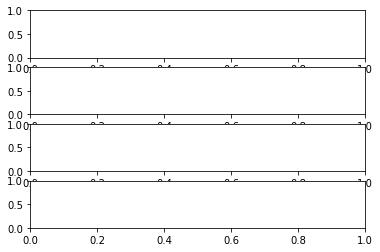

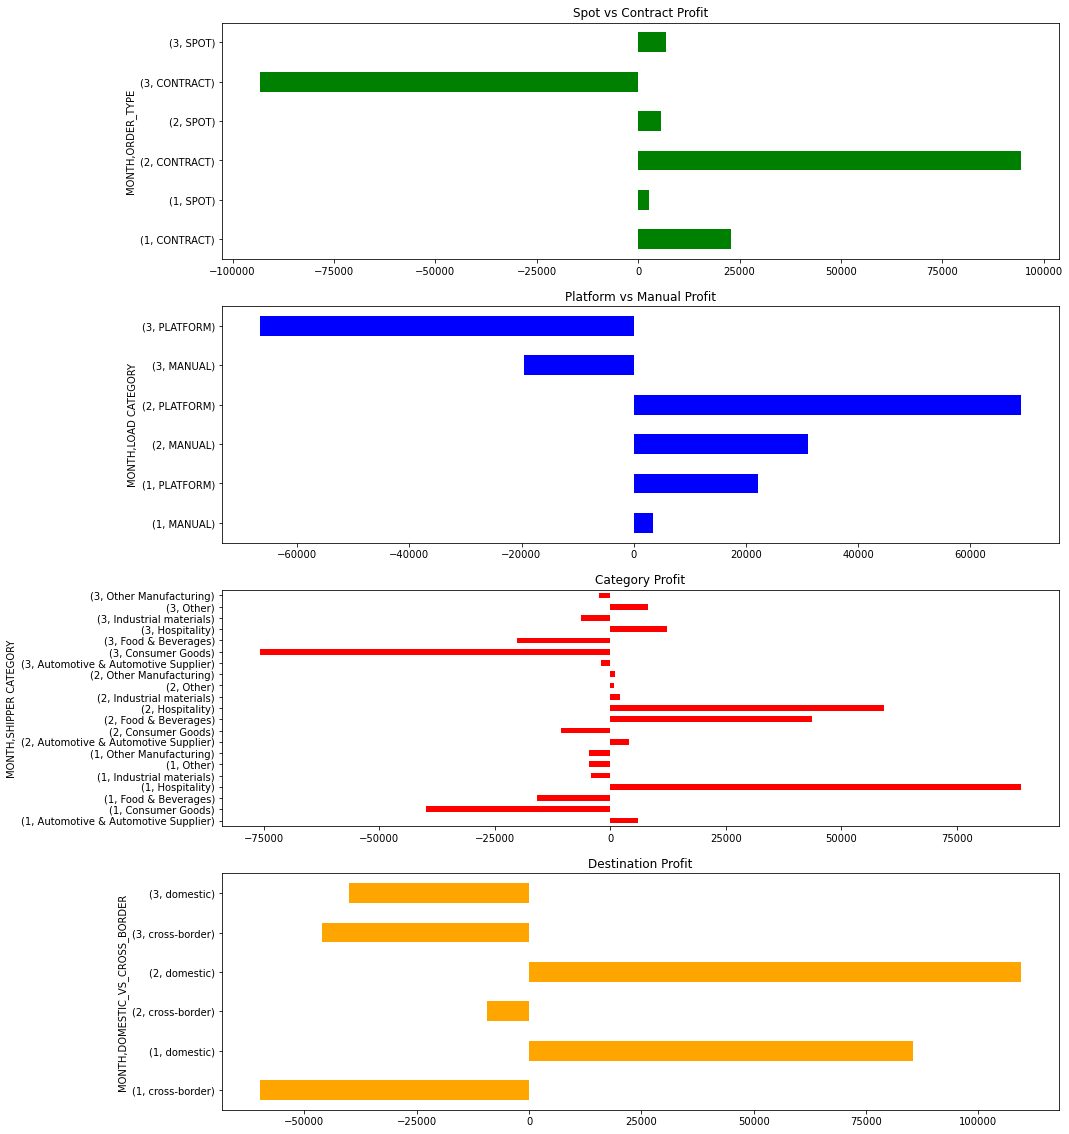

In [179]:
fig, axs = plt.subplots(4, 1)
plt.figure(figsize=(15,20))

#plot 1
plt.subplot(4, 1,1)
axs = sum_profit1.plot.barh(title='Spot vs Contract Profit',color='green')

#plot 2
plt.subplot(4, 1,2)
axs = sum_profit2.plot.barh(title='Platform vs Manual Profit',color='blue')

#plot 3
plt.subplot(4, 1,3)
axs=sum_profit3.plot.barh(title='Category Profit',color='red')

#plot 4
plt.subplot(4, 1,4)
axs=sum_profit4.plot.barh(title='Destination Profit',color='orange')



plt.show()

So overall the best performing area is:
1. Feb contract loads
2. Feb loads booked on the platform
3. Feb Hospitality and Food&Beverages and Jan Hospitaltiy sector
4. Feb and Jan Domestic loads

And the worst performing area is
1. March contract loads
2. March loads booked on the platform
3. March and Jan consumer goods sector
4. March cross-border and domestic and Jan cross-border

In [180]:
active_customers_month = q1.groupby('MONTH')['SHIPPER ID'].nunique()
print(active_customers_month)

MONTH
1     81
2     96
3    104
Name: SHIPPER ID, dtype: int64


<AxesSubplot:xlabel='MONTH'>

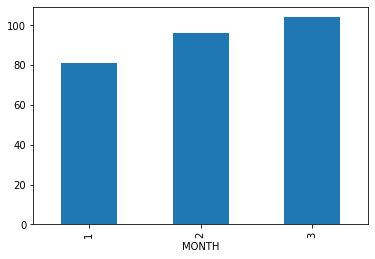

In [181]:
active_customers_month.plot(kind='bar')

In [182]:
cols = ['PROFIT','SHIPPER_PRICE (REVENUE)','CARRIER_PRICE (COST)','LOADS']
q1[cols].sum()

PROFIT                      39447.84775
SHIPPER_PRICE (REVENUE)   8839645.33875
CARRIER_PRICE (COST)      8800197.49100
LOADS                       10091.00000
dtype: float64

In [183]:
margin = q1['PROFIT'].sum() / q1['SHIPPER_PRICE (REVENUE)'].sum() * 100
print(margin)

0.44626052560133994


Want to increase margin by 2% so ~0.45% to 2.45%

In [184]:
profit = q1['PROFIT'].sum()
print(profit)

39447.8477500001


In [185]:
new_profit = profit * 1.02
print(new_profit)

40236.804705000104


In [186]:
difference = new_profit - profit
print(difference)

788.9569550000015


So target is to increase revenue by 789 or decrease costs by 789 or combination of both that equals 789


Examine worst performing area at macro level which is
### 1. MACRO
1. Spot loads
2. Booked manually
3. Consumer goods sector
4. Cross-border

And the worst performing area is

### 2. MICRO
1. March contract loads
2. March loads booked on the platform
3. March and Jan consumer goods sector
4. March cross-border and domestic and Jan cross-border

Characteristics in common are the consumer goods sector and cross-border loads


In [187]:
q1.head()

,PICKUP_MONTH,SHIPPER ID,SHIPPER CATEGORY,LOAD CATEGORY,ORDER_TYPE,DOMESTIC_VS_CROSS_BORDER,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST),MONTH,PROFIT,AVG_PROFIT_LOAD,AVG_REV_LOAD,AVG_EXP_LOAD,MARGIN
0,2020-01-01,0010O00001vmYzfQAE,Food & Beverages,PLATFORM,CONTRACT,domestic,141,106909.44813,107080.23750,1,-170.78937,-1.21127,758.22304,759.43431,-0.15975
1,2020-01-01,0010O00002M1P8nQAF,Industrial materials,PLATFORM,CONTRACT,cross-border,1,2702.50000,2300.00000,1,402.50000,402.50000,2702.50000,2300.00000,14.89362
2,2020-01-01,0013Y00002UjLn1QAF,Industrial materials,PLATFORM,SPOT,cross-border,1,1091.25000,1030.62500,1,60.62500,60.62500,1091.25000,1030.62500,5.55556
3,2020-01-01,0010O00002Bji22QAB,Other Manufacturing,PLATFORM,SPOT,cross-border,5,13051.25000,10361.50000,1,2689.75000,537.95000,2610.25000,2072.30000,20.60914
4,2020-01-01,0013Y00002UkaqeQAB,Food & Beverages,PLATFORM,CONTRACT,cross-border,1,2227.50000,2014.87500,1,212.62500,212.62500,2227.50000,2014.87500,9.54545


In [188]:
con_goods = q1[q1['SHIPPER CATEGORY'] == 'Consumer Goods']

In [189]:
con_goods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 14 to 436
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   PICKUP_MONTH              45 non-null     datetime64[ns]
 1   SHIPPER ID                45 non-null     object        
 2   SHIPPER CATEGORY          45 non-null     object        
 3   LOAD CATEGORY             45 non-null     object        
 4   ORDER_TYPE                45 non-null     object        
 5   DOMESTIC_VS_CROSS_BORDER  45 non-null     object        
 6   LOADS                     45 non-null     int64         
 7   SHIPPER_PRICE (REVENUE)   45 non-null     float64       
 8   CARRIER_PRICE (COST)      45 non-null     float64       
 9   MONTH                     45 non-null     int64         
 10  PROFIT                    45 non-null     float64       
 11  AVG_PROFIT_LOAD           45 non-null     float64       
 12  AVG_REV_LOAD          

In [190]:
con_goods.head()

,PICKUP_MONTH,SHIPPER ID,SHIPPER CATEGORY,LOAD CATEGORY,ORDER_TYPE,DOMESTIC_VS_CROSS_BORDER,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST),MONTH,PROFIT,AVG_PROFIT_LOAD,AVG_REV_LOAD,AVG_EXP_LOAD,MARGIN
14,2020-01-01,0013Y00002QBH2iQAH,Consumer Goods,PLATFORM,CONTRACT,cross-border,4,12643.14700,12746.25000,1,-103.10300,-25.77575,3160.78675,3186.56250,-0.81549
21,2020-01-01,0010O00002BF1aSQAT,Consumer Goods,MANUAL,SPOT,cross-border,2,1040.00000,1000.00000,1,40.00000,20.00000,520.00000,500.00000,3.84615
27,2020-01-01,0013Y00002Sjx0wQAB,Consumer Goods,PLATFORM,CONTRACT,cross-border,6,6115.03750,6881.87500,1,-766.83750,-127.80625,1019.17292,1146.97917,-12.54019
34,2020-01-01,0010O00002BF1aSQAT,Consumer Goods,PLATFORM,CONTRACT,cross-border,39,22745.00000,24625.00000,1,-1880.00000,-48.20513,583.20513,631.41026,-8.26555
61,2020-01-01,0010O00002BjsojQAB,Consumer Goods,PLATFORM,SPOT,cross-border,1,2998.12500,2844.37500,1,153.75000,153.75000,2998.12500,2844.37500,5.12821


In [191]:
con_goods['SHIPPER_PRICE (REVENUE)'].sum()

1651874.08725

In [192]:
con_goods['CARRIER_PRICE (COST)'].sum()

1778364.4125

In [193]:
con_goods.nunique()

PICKUP_MONTH                 3
SHIPPER ID                   9
SHIPPER CATEGORY             1
LOAD CATEGORY                2
ORDER_TYPE                   2
DOMESTIC_VS_CROSS_BORDER     2
LOADS                       24
SHIPPER_PRICE (REVENUE)     45
CARRIER_PRICE (COST)        45
MONTH                        3
PROFIT                      44
AVG_PROFIT_LOAD             44
AVG_REV_LOAD                45
AVG_EXP_LOAD                45
MARGIN                      45
dtype: int64

In [135]:
con_goods

,SHIPPER ID,SHIPPER CATEGORY,LOAD CATEGORY,ORDER_TYPE,DOMESTIC_VS_CROSS_BORDER,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST),MONTH,PROFIT,AVG_PROFIT_LOAD,AVG_REV_LOAD,AVG_EXP_LOAD
14,0013Y00002QBH2iQAH,Consumer Goods,PLATFORM,CONTRACT,cross-border,4,12643.14700,12746.25000,1,-103.10300,-25.77575,3160.78675,3186.56250
21,0010O00002BF1aSQAT,Consumer Goods,MANUAL,SPOT,cross-border,2,1040.00000,1000.00000,1,40.00000,20.00000,520.00000,500.00000
27,0013Y00002Sjx0wQAB,Consumer Goods,PLATFORM,CONTRACT,cross-border,6,6115.03750,6881.87500,1,-766.83750,-127.80625,1019.17292,1146.97917
34,0010O00002BF1aSQAT,Consumer Goods,PLATFORM,CONTRACT,cross-border,39,22745.00000,24625.00000,1,-1880.00000,-48.20513,583.20513,631.41026
61,0010O00002BjsojQAB,Consumer Goods,PLATFORM,SPOT,cross-border,1,2998.12500,2844.37500,1,153.75000,153.75000,2998.12500,2844.37500
64,0010O00002BF1aSQAT,Consumer Goods,MANUAL,CONTRACT,domestic,3,1687.32000,2265.00000,1,-577.68000,-192.56000,562.44000,755.00000
79,0010O00002E9BbyQAF,Consumer Goods,PLATFORM,CONTRACT,domestic,40,37294.67300,36852.37500,1,442.29800,11.05745,932.36683,921.30938
80,0010O00002BjsojQAB,Consumer Goods,PLATFORM,CONTRACT,cross-border,41,71347.68750,81379.87500,1,-10032.18750,-244.68750,1740.18750,1984.87500
104,0010O00002BF1aSQAT,Consumer Goods,MANUAL,CONTRACT,cross-border,5,2130.00000,2150.00000,1,-20.00000,-4.00000,426.00000,430.00000
110,0010O00002BF1aSQAT,Consumer Goods,PLATFORM,CONTRACT,domestic,217,119992.58000,133295.00000,1,-13302.42000,-61.30147,552.96120,614.26267


In [194]:
con_goods['SHIPPER_PRICE (REVENUE)'].sum() - con_goods['CARRIER_PRICE (COST)'].sum()

-126490.32525

In [201]:
# CHECK THIS STEP WRT TO LOADS BEING TOTAL LOADS AND NOT JUST THE COUNT OF ROWS!??
con_goods_shippers = con_goods.groupby('SHIPPER ID')['LOADS'].max().sort_values(ascending=False)

In [202]:
con_goods_shippers

SHIPPER ID
0010O00002BF1aSQAT    280
0010O00002E9BbyQAF    226
0010O00002BjsojQAB     41
0013Y00002QBH2iQAH      6
0013Y00002Sjx0wQAB      6
0013Y00002ZJA6vQAH      6
0010O00001s4Cg9QAE      1
0010O00002Ol0CLQAZ      1
0013Y00002ZKs4CQAT      1
Name: LOADS, dtype: int64

So just 9 shippers make up the consumer goods division, to note are the two highest groups, lets examine them more closely

In [203]:
q1[q1['SHIPPER ID']=='0010O00002BF1aSQAT']

,PICKUP_MONTH,SHIPPER ID,SHIPPER CATEGORY,LOAD CATEGORY,ORDER_TYPE,DOMESTIC_VS_CROSS_BORDER,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST),MONTH,PROFIT,AVG_PROFIT_LOAD,AVG_REV_LOAD,AVG_EXP_LOAD,MARGIN
21,2020-01-01,0010O00002BF1aSQAT,Consumer Goods,MANUAL,SPOT,cross-border,2,1040.00000,1000.00000,1,40.00000,20.00000,520.00000,500.00000,3.84615
34,2020-01-01,0010O00002BF1aSQAT,Consumer Goods,PLATFORM,CONTRACT,cross-border,39,22745.00000,24625.00000,1,-1880.00000,-48.20513,583.20513,631.41026,-8.26555
64,2020-01-01,0010O00002BF1aSQAT,Consumer Goods,MANUAL,CONTRACT,domestic,3,1687.32000,2265.00000,1,-577.68000,-192.56000,562.44000,755.00000,-34.23654
104,2020-01-01,0010O00002BF1aSQAT,Consumer Goods,MANUAL,CONTRACT,cross-border,5,2130.00000,2150.00000,1,-20.00000,-4.00000,426.00000,430.00000,-0.93897
110,2020-01-01,0010O00002BF1aSQAT,Consumer Goods,PLATFORM,CONTRACT,domestic,217,119992.58000,133295.00000,1,-13302.42000,-61.30147,552.96120,614.26267,-11.08604
150,2020-02-01,0010O00002BF1aSQAT,Consumer Goods,PLATFORM,CONTRACT,cross-border,58,33815.00000,33585.00000,2,230.00000,3.96552,583.01724,579.05172,0.68017
159,2020-02-01,0010O00002BF1aSQAT,Consumer Goods,PLATFORM,CONTRACT,domestic,173,87230.55000,91730.00000,2,-4499.45000,-26.00838,504.22283,530.23121,-5.15811
183,2020-02-01,0010O00002BF1aSQAT,Consumer Goods,MANUAL,SPOT,cross-border,2,3080.00000,2750.00000,2,330.00000,165.00000,1540.00000,1375.00000,10.71429
199,2020-02-01,0010O00002BF1aSQAT,Consumer Goods,MANUAL,CONTRACT,domestic,7,3557.81000,3790.00000,2,-232.19000,-33.17000,508.25857,541.42857,-6.52621
228,2020-02-01,0010O00002BF1aSQAT,Consumer Goods,MANUAL,CONTRACT,cross-border,2,1200.00000,1160.00000,2,40.00000,20.00000,600.00000,580.00000,3.33333


In [179]:
x = con_goods[con_goods['SHIPPER ID']=='0010O00002BF1aSQAT']

In [180]:
x

,SHIPPER ID,SHIPPER CATEGORY,LOAD CATEGORY,ORDER_TYPE,DOMESTIC_VS_CROSS_BORDER,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST),MONTH,PROFIT,AVG_PROFIT_LOAD,AVG_REV_LOAD,AVG_EXP_LOAD
21,0010O00002BF1aSQAT,Consumer Goods,MANUAL,SPOT,cross-border,2,1040.00000,1000.00000,1,40.00000,20.00000,520.00000,500.00000
34,0010O00002BF1aSQAT,Consumer Goods,PLATFORM,CONTRACT,cross-border,39,22745.00000,24625.00000,1,-1880.00000,-48.20513,583.20513,631.41026
64,0010O00002BF1aSQAT,Consumer Goods,MANUAL,CONTRACT,domestic,3,1687.32000,2265.00000,1,-577.68000,-192.56000,562.44000,755.00000
104,0010O00002BF1aSQAT,Consumer Goods,MANUAL,CONTRACT,cross-border,5,2130.00000,2150.00000,1,-20.00000,-4.00000,426.00000,430.00000
110,0010O00002BF1aSQAT,Consumer Goods,PLATFORM,CONTRACT,domestic,217,119992.58000,133295.00000,1,-13302.42000,-61.30147,552.96120,614.26267
150,0010O00002BF1aSQAT,Consumer Goods,PLATFORM,CONTRACT,cross-border,58,33815.00000,33585.00000,2,230.00000,3.96552,583.01724,579.05172
159,0010O00002BF1aSQAT,Consumer Goods,PLATFORM,CONTRACT,domestic,173,87230.55000,91730.00000,2,-4499.45000,-26.00838,504.22283,530.23121
183,0010O00002BF1aSQAT,Consumer Goods,MANUAL,SPOT,cross-border,2,3080.00000,2750.00000,2,330.00000,165.00000,1540.00000,1375.00000
199,0010O00002BF1aSQAT,Consumer Goods,MANUAL,CONTRACT,domestic,7,3557.81000,3790.00000,2,-232.19000,-33.17000,508.25857,541.42857
228,0010O00002BF1aSQAT,Consumer Goods,MANUAL,CONTRACT,cross-border,2,1200.00000,1160.00000,2,40.00000,20.00000,600.00000,580.00000


In [183]:
x['SHIPPER_PRICE (REVENUE)'].sum()

465915.61000000004

In [187]:
x['margin_option_1'] = x['SHIPPER_PRICE (REVENUE)']*0.005

<ipython-input-187-1db924d0eb32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['margin_option_1'] = x['SHIPPER_PRICE (REVENUE)']*0.005


In [188]:
x['margin_option_1'].sum()

2329.57805

So could increase shipping price to that customer by 0.5% as an example - or focus on other areas where performing very well and change those financials

## END OF ANALYSIS